In [2]:
from bs4 import BeautifulSoup as bs
import requests

In [3]:
url = 'https://en.wikipedia.org/wiki/Canoo'
url2 = 'https://www.canoo.com/about/'
url3 = 'https://www.globaldata.com/company-profile/canoo-inc/'
url5 = 'https://dcf.fm/blogs/blog/goev-bcg-matrix'
url6 = 'https://in.marketscreener.com/quote/stock/CANOO-INC-57291647/news/CANOO-INC-MANAGEMENT-S-DISCUSSION-AND-ANALYSIS-OF-FINANCIAL-CONDITION-AND-RESULTS-OF-OPERATIONS-f-43386654/'
page = requests.get(url)


soup = bs(page.text, 'html')

In [4]:
print(soup)

<!DOCTYPE html>
<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled vector-feature-custom-font-size-clientpref-0 vector-feature-client-preferences-disabled vector-feature-client-prefs-pinned-disabled vector-feature-night-mode-disabled skin-night-mode-clientpref-0 vector-toc-available" dir="ltr" lang="en">
<head>
<meta charset="utf-8"/>
<title>Canoo - Wikipedia</title>
<script>(function(){var className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature

In [5]:
para1 = soup.find_all('p')


In [6]:
print(para1)

[<p class="mw-empty-elt">
</p>, <p><b>Canoo Inc.</b> is an American <a class="mw-redirect" href="/wiki/Automotive" title="Automotive">automotive</a> company based in <a href="/wiki/Torrance,_California" title="Torrance, California">Torrance, California</a>, that develops and manufactures <a href="/wiki/Electric_vehicle" title="Electric vehicle">electric vehicles</a>.<sup class="reference" id="cite_ref-2"><a href="#cite_note-2">[2]</a></sup><sup class="reference" id="cite_ref-3"><a href="#cite_note-3">[3]</a></sup> Canoo's research &amp; development team is based in <a href="/wiki/Michigan" title="Michigan">Michigan</a>, in the <a href="/wiki/Metro_Detroit" title="Metro Detroit">Detroit region</a> (<a href="/wiki/Auburn_Hills,_Michigan" title="Auburn Hills, Michigan">Auburn Hills</a>, <a href="/wiki/Livonia,_Michigan" title="Livonia, Michigan">Livonia</a>), and production operations are in <a href="/wiki/Justin,_Texas" title="Justin, Texas">Justin, Texas</a>. The company also plans to p

In [8]:
for paragraph in para1:
    paragraph_text = paragraph.get_text(separator='\n', strip=True).replace('\n', '')
    print(paragraph_text)


Canoo Inc.is an Americanautomotivecompany based inTorrance, California, that develops and manufactureselectric vehicles.[2][3]Canoo's research & development team is based inMichigan, in theDetroit region(Auburn Hills,Livonia), and production operations are inJustin, Texas. The company also plans to producecommercial electric vehiclessuch as vans for fleet, vehicle rental and ride sharing services.[4]
Canoo was founded in 2017 under the nameEvelozcityby Stefan Krause and Ulrich Kranz. Krause worked forDeutsche Bankas its chief financial officer while Kranz worked forBMWas a senior executive. Both men met at rival EV companyFaraday Futurebefore leaving together to form their own company in 2017, due to disagreement with Faraday Future's leadership. Krause took on the role of chief executive officer at Evelozcity, and Kranz becamechief technology officer.[5]The company received its primary funding from Chinese investorLi "David" Pak-Tam/Botanand German entrepreneur David Stern.[6][7]
In 

In [9]:
print(paragraph_text)

In January 2024, Canoo announced the Postal Service (USPS) order for six right-hand-drive LDV vans.[57][58][59]


In [10]:
import re

def remove_substrings(text):
    pattern = r'\[\d+\]'
    
    matches = re.findall(pattern, text)
    
    n = max(int(match[1:-1]) for match in matches) if matches else 0
    
    for i in range(n + 1):
        text = re.sub(pattern, '', text)
    
    return text

modified_paragraph = remove_substrings(paragraph_text)
print(modified_paragraph)

In January 2024, Canoo announced the Postal Service (USPS) order for six right-hand-drive LDV vans.


In [13]:
import re

def remove_substrings(text):
    pattern = r'\[\d+\]'
    return re.sub(pattern, '', text)

all_modified_paragraph = ""

for paragraph in para1:
    paragraph_text = paragraph.get_text(separator=' ', strip=True)
    modified_paragraph = remove_substrings(paragraph_text)
    all_modified_paragraph += modified_paragraph + "\n\n"

all_modified_paragraph = all_modified_paragraph.strip()

print(all_modified_paragraph)

Canoo Inc. is an American automotive company based in Torrance, California , that develops and manufactures electric vehicles .   Canoo's research & development team is based in Michigan , in the Detroit region ( Auburn Hills , Livonia ), and production operations are in Justin, Texas . The company also plans to produce commercial electric vehicles such as vans for fleet, vehicle rental and ride sharing services. 

Canoo was founded in 2017 under the name Evelozcity by Stefan Krause and Ulrich Kranz. Krause worked for Deutsche Bank as its chief financial officer while Kranz worked for BMW as a senior executive. Both men met at rival EV company Faraday Future before leaving together to form their own company in 2017, due to disagreement with Faraday Future's leadership. Krause took on the role of chief executive officer at Evelozcity, and Kranz became chief technology officer .  The company received its primary funding from Chinese investor Li "David" Pak-Tam/Botan and German entreprene

In [14]:
import pandas as pd

paragraphs_list = all_modified_paragraph.split('\n\n')

df = pd.DataFrame({'Paragraph': paragraphs_list})

print(df)


                                            Paragraph
0   Canoo Inc. is an American automotive company b...
1   Canoo was founded in 2017 under the name Evelo...
2   In April 2018, Evelozcity Canoo hired Karl-Tho...
3                                                    
4   In September 2019, the company presented its f...
5   In February 2020, Hyundai Motor Group , the pa...
6   In July 2020, co-founder Stefan Krause left th...
7   In July 2020, Canoo featured on the TV program...
8   In September 2020, Canoo announced a merger wi...
9   A few days before its stock exchange debut, th...
10  In mid-January 2021, The Verge reported that i...
11  In May 2022, it was reported that Canoo was st...
12  In December 2022, the company sued several for...
13                                                   
14  On March 11, 2021, Canoo announced the Canoo P...
15  It was announced in March 2021 that Canoo had ...
16  On April 22, 2021, the company announced that ...
17  On June 17, 2021, the co

In [304]:
df.to_csv('paragraph.csv')

In [15]:
page = requests.get(url2)

soup = bs(page.text, 'html')

In [16]:
print(soup)

<!DOCTYPE html>
<html lang="en"><head><meta charset="utf-8"/><meta content="ie=edge" http-equiv="x-ua-compatible"/><meta content="width=device-width, initial-scale=1, shrink-to-fit=no" name="viewport"/><style id="typography.js">html{font-family:sans-serif;-ms-text-size-adjust:100%;-webkit-text-size-adjust:100%}body{margin:0}article,aside,details,figcaption,figure,footer,header,main,menu,nav,section,summary{display:block}audio,canvas,progress,video{display:inline-block}audio:not([controls]){display:none;height:0}progress{vertical-align:baseline}[hidden],template{display:none}a{background-color:transparent;}a:active,a:hover{outline-width:0}abbr[title]{border-bottom:none;text-decoration:underline;text-decoration:underline dotted}b,strong{font-weight:inherit;font-weight:bolder}dfn{font-style:italic}h1{font-size:2em;margin:.67em 0}mark{background-color:#ff0;color:#000}small{font-size:80%}sub,sup{font-size:75%;line-height:0;position:relative;vertical-align:baseline}sub{bottom:-.25em}sup{top:

In [17]:
para_url2 = soup.find_all('p')[1]

In [18]:
print(para_url2)

<p>Distinguished by its experienced team from leading technology and automotive companies âÂ CanooÂ has designed a modular electric platform purpose-built to deliver maximum vehicle interior space that is customizable across all owners in the vehicle lifecycle to support a wide range of vehicle applications for consumers and businesses.<br/><br/></p>


In [19]:
para_url2 = para_url2.text

In [20]:
print(para_url2)

Distinguished by its experienced team from leading technology and automotive companies âÂ CanooÂ has designed a modular electric platform purpose-built to deliver maximum vehicle interior space that is customizable across all owners in the vehicle lifecycle to support a wide range of vehicle applications for consumers and businesses.


In [21]:
import pandas as pd

df2 = pd.DataFrame({'Paragraph': [para_url2]})
df = pd.concat([df, df2], ignore_index=True)

print(df)

                                            Paragraph
0   Canoo Inc. is an American automotive company b...
1   Canoo was founded in 2017 under the name Evelo...
2   In April 2018, Evelozcity Canoo hired Karl-Tho...
3                                                    
4   In September 2019, the company presented its f...
5   In February 2020, Hyundai Motor Group , the pa...
6   In July 2020, co-founder Stefan Krause left th...
7   In July 2020, Canoo featured on the TV program...
8   In September 2020, Canoo announced a merger wi...
9   A few days before its stock exchange debut, th...
10  In mid-January 2021, The Verge reported that i...
11  In May 2022, it was reported that Canoo was st...
12  In December 2022, the company sued several for...
13                                                   
14  On March 11, 2021, Canoo announced the Canoo P...
15  It was announced in March 2021 that Canoo had ...
16  On April 22, 2021, the company announced that ...
17  On June 17, 2021, the co

In [22]:
page = requests.get(url3)


soup = bs(page.text, 'html')

In [23]:
print(soup)

<!DOCTYPE html>
<html lang="en-us">
<head>
<meta charset="utf-8"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="width=device-width, initial-scale=1.0, user-scalable=no" name="viewport"/>
<meta content="index, follow, max-image-preview:large, max-snippet:-1, max-video-preview:-1" name="robots"/>
<meta content="summary" name="twitter:card"/>
<meta content="https://www.globaldata.com/Uploads/Company/4471659/logo.png" name="twitter:image"/>
<meta content="https://twitter.com/globaldataplc" name="twitter:site"/>
<meta content="Canoo Inc Company Profile - Overview" name="twitter:title"/>
<meta content="Canoo Inc company profile analysis with the premuim data - Globaldata " name="twitter:description"/>
<meta content="Canoo Inc Company Profile - Overview" property="og:title"/>
<meta content="https://www.globaldata.com/Uploads/Company/4471659/logo.png" name="og:image"/>
<meta content="Canoo Inc company profile analysis with the premuim data - Globaldata " property="og:d

In [24]:
para_url3 = soup.find_all('p')

In [25]:
print(para_url3)

[<p style="white-space: pre-line !important;">Canoo Inc (Canoo) is a high tech advanced mobility technology company. The company’s product offerings include true steer-by-wire, leaf spring suspension systems, advanced drivetrain systems, battery and battery management systems, electrical systems architecture, lifestyle vehicles and delivery, multi-purpose delivery vehicles and pickup. It provides electric vehicle concept, design and engineering services for auto original equipment manufacturers (OEMs). Canoo develops the Canoo Digital Ecosystem software to provide key tools for passenger vehicles and fleets with products spanning lifestyle, fleet management, security and safety, household and asset management use cases. The company serves businesses and consumers. It operates offices in California, Arkansas, Oklahama, Texas and Michigan. Canoo is headquartered in Torrance, California, the US.</p>, <p>Explore worldwide vehicle development plans for brands from Canoo Inc with a catalogue

In [26]:
Company_detail3 = ""
for paragraph in para_url3:
    paragraph_text3 = paragraph.get_text(separator='\n', strip=True).replace('\n', '')
    Company_detail3 += paragraph_text3 + "\n" 
print(Company_detail3)

Canoo Inc (Canoo) is a high tech advanced mobility technology company. The company’s product offerings include true steer-by-wire, leaf spring suspension systems, advanced drivetrain systems, battery and battery management systems, electrical systems architecture, lifestyle vehicles and delivery, multi-purpose delivery vehicles and pickup. It provides electric vehicle concept, design and engineering services for auto original equipment manufacturers (OEMs). Canoo develops the Canoo Digital Ecosystem software to provide key tools for passenger vehicles and fleets with products spanning lifestyle, fleet management, security and safety, household and asset management use cases. The company serves businesses and consumers. It operates offices in California, Arkansas, Oklahama, Texas and Michigan. Canoo is headquartered in Torrance, California, the US.
Explore worldwide vehicle development plans for brands from Canoo Inc with a catalogue of vehicles.
History section provides information on 

In [27]:
print(Company_detail3)

Canoo Inc (Canoo) is a high tech advanced mobility technology company. The company’s product offerings include true steer-by-wire, leaf spring suspension systems, advanced drivetrain systems, battery and battery management systems, electrical systems architecture, lifestyle vehicles and delivery, multi-purpose delivery vehicles and pickup. It provides electric vehicle concept, design and engineering services for auto original equipment manufacturers (OEMs). Canoo develops the Canoo Digital Ecosystem software to provide key tools for passenger vehicles and fleets with products spanning lifestyle, fleet management, security and safety, household and asset management use cases. The company serves businesses and consumers. It operates offices in California, Arkansas, Oklahama, Texas and Michigan. Canoo is headquartered in Torrance, California, the US.
Explore worldwide vehicle development plans for brands from Canoo Inc with a catalogue of vehicles.
History section provides information on 

In [28]:
df2 = pd.DataFrame({'Paragraph': [para_url2]})
df = pd.concat([df, df2], ignore_index=True)

print(df)

                                            Paragraph
0   Canoo Inc. is an American automotive company b...
1   Canoo was founded in 2017 under the name Evelo...
2   In April 2018, Evelozcity Canoo hired Karl-Tho...
3                                                    
4   In September 2019, the company presented its f...
5   In February 2020, Hyundai Motor Group , the pa...
6   In July 2020, co-founder Stefan Krause left th...
7   In July 2020, Canoo featured on the TV program...
8   In September 2020, Canoo announced a merger wi...
9   A few days before its stock exchange debut, th...
10  In mid-January 2021, The Verge reported that i...
11  In May 2022, it was reported that Canoo was st...
12  In December 2022, the company sued several for...
13                                                   
14  On March 11, 2021, Canoo announced the Canoo P...
15  It was announced in March 2021 that Canoo had ...
16  On April 22, 2021, the company announced that ...
17  On June 17, 2021, the co

In [29]:
df3 = pd.DataFrame({'Paragraph' :[Company_detail3]})

In [30]:
print(df3)

                                           Paragraph
0  Canoo Inc (Canoo) is a high tech advanced mobi...


In [31]:
df = pd.concat([df, df3], ignore_index=True)

In [32]:
print(df)

                                            Paragraph
0   Canoo Inc. is an American automotive company b...
1   Canoo was founded in 2017 under the name Evelo...
2   In April 2018, Evelozcity Canoo hired Karl-Tho...
3                                                    
4   In September 2019, the company presented its f...
5   In February 2020, Hyundai Motor Group , the pa...
6   In July 2020, co-founder Stefan Krause left th...
7   In July 2020, Canoo featured on the TV program...
8   In September 2020, Canoo announced a merger wi...
9   A few days before its stock exchange debut, th...
10  In mid-January 2021, The Verge reported that i...
11  In May 2022, it was reported that Canoo was st...
12  In December 2022, the company sued several for...
13                                                   
14  On March 11, 2021, Canoo announced the Canoo P...
15  It was announced in March 2021 that Canoo had ...
16  On April 22, 2021, the company announced that ...
17  On June 17, 2021, the co

In [33]:
page = requests.get(url3)


soup = bs(page.text, 'html')

In [34]:
print(soup)

<!DOCTYPE html>
<html lang="en-us">
<head>
<meta charset="utf-8"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="width=device-width, initial-scale=1.0, user-scalable=no" name="viewport"/>
<meta content="index, follow, max-image-preview:large, max-snippet:-1, max-video-preview:-1" name="robots"/>
<meta content="summary" name="twitter:card"/>
<meta content="https://www.globaldata.com/Uploads/Company/4471659/logo.png" name="twitter:image"/>
<meta content="https://twitter.com/globaldataplc" name="twitter:site"/>
<meta content="Canoo Inc Company Profile - Overview" name="twitter:title"/>
<meta content="Canoo Inc company profile analysis with the premuim data - Globaldata " name="twitter:description"/>
<meta content="Canoo Inc Company Profile - Overview" property="og:title"/>
<meta content="https://www.globaldata.com/Uploads/Company/4471659/logo.png" name="og:image"/>
<meta content="Canoo Inc company profile analysis with the premuim data - Globaldata " property="og:d

In [35]:
para_url4 = soup.find('div', class_ = 'card-cluster metrics columnise bound rule columnise-s-large-up-3')

In [36]:
print(para_url4)

<div class="card-cluster metrics columnise bound rule columnise-s-large-up-3" data-leveler="">
<div class="card metrics" data-level="">
<span class="head">Headquarters</span>
<span class="metric-data">United States of America</span>
</div>
<hr class="head foot"/>
<div class="card metrics" data-level="">
<span class="head">Address</span>
<span class="metric-data">19951 Mariner Avenue, Torrance, California, 90503</span>
</div>
<hr class="head foot"/>
<div class="card metrics" data-level="">
<span class="head">Website</span>
<span class="metric-data">
<a href="http://www.canoo.com">
                                        www.canoo.com
                                    </a>
</span>
</div>
<hr class="head foot"/>
<span id="premium-databases"></span>
<div class="card metrics" data-level="">
<span class="head">Telephone</span>
<span class="metric-data">1 424 2712144</span>
</div>
<hr class="head foot show-for-small hide-for-s-large"/>
<div class="card metrics" data-level="">
<span class="h

In [37]:
Company_detail4 = ""
for paragraph in para_url4:
    paragraph_text4 = paragraph.get_text(separator='\n', strip=True)
    Company_detail4 += paragraph_text4 + "\n"
print(Company_detail4)


Headquarters
United States of America



Address
19951 Mariner Avenue, Torrance, California, 90503



Website
www.canoo.com





Telephone
1 424 2712144



No of Employees
812



Industry
Automotive



Ticker Symbol & Exchange
GOEV (NASD)



EPS
XYZ



Net Income (2022)
XYZ
-40.6%
(2022 vs 2021)



Market Cap*
$176.0M



Net Profit Margin (2020)
XYZ
0.0%
(2022 vs 2021)










In [38]:
df4 = pd.DataFrame({'Paragraph' :[Company_detail4]})

In [39]:
df4.head()

,Paragraph
0,\nHeadquarters\nUnited States of America\n\n\n...


In [40]:
details_segments4 = Company_detail4.split('\n\n\n')

details_segments4 = [segment.strip() for segment in details_segments4 if segment.strip()]

df4 = pd.DataFrame({'Paragraph': details_segments4})

print(df4)

                                            Paragraph
0              Headquarters\nUnited States of America
1   Address\n19951 Mariner Avenue, Torrance, Calif...
2                              Website\nwww.canoo.com
3                            Telephone\n1 424 2712144
4                                No of Employees\n812
5                                Industry\nAutomotive
6               Ticker Symbol & Exchange\nGOEV (NASD)
7                                            EPS\nXYZ
8      Net Income (2022)\nXYZ\n-40.6%\n(2022 vs 2021)
9                                Market Cap*\n$176.0M
10  Net Profit Margin (2020)\nXYZ\n0.0%\n(2022 vs ...


In [41]:
df = pd.concat([df, df4], ignore_index=True)

In [42]:
print(df)

                                            Paragraph
0   Canoo Inc. is an American automotive company b...
1   Canoo was founded in 2017 under the name Evelo...
2   In April 2018, Evelozcity Canoo hired Karl-Tho...
3                                                    
4   In September 2019, the company presented its f...
5   In February 2020, Hyundai Motor Group , the pa...
6   In July 2020, co-founder Stefan Krause left th...
7   In July 2020, Canoo featured on the TV program...
8   In September 2020, Canoo announced a merger wi...
9   A few days before its stock exchange debut, th...
10  In mid-January 2021, The Verge reported that i...
11  In May 2022, it was reported that Canoo was st...
12  In December 2022, the company sued several for...
13                                                   
14  On March 11, 2021, Canoo announced the Canoo P...
15  It was announced in March 2021 that Canoo had ...
16  On April 22, 2021, the company announced that ...
17  On June 17, 2021, the co

In [43]:
page = requests.get(url5)


soup = bs(page.text, 'html')

In [44]:
print(soup)

<!DOCTYPE html>
<html class="t4sp-theme no-js t4s-wrapper__custom rtl_false swatch_color_style_2 pr_img_effect_2 enable_eff_img1_false badge_shape_3 badge_reverse_color_false css_for_wis_app_false shadow_round_img_ t4s-header__inline is-remove-unavai-1 t4_has_quickview_false t4_has_quickshop_false t4_has_atc_false t4_compare_false is-catalog__mode-false t4s-popup-qv t4s-cart-count-0 t4s-pr-ellipsis-false" lang="en">
<head>
<meta charset="utf-8"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="width=device-width, initial-scale=1, height=device-height, minimum-scale=1.0, maximum-scale=1.0" name="viewport"/>
<!-- Google AdSense Verification -->
<meta content="ca-pub-6227798532143385" name="google-adsense-account"/>
<!-- Google AdSense Script -->
<script async="" crossorigin="anonymous" src="https://pagead2.googlesyndication.com/pagead/js/adsbygoogle.js?client=ca-pub-6227798532143385"></script>
<meta content="#ffffff" name="theme-color"/>
<link href="https://dcf.fm/b

In [45]:
para_url5 = soup.find_all('p')

In [46]:
print(para_url5)

[<p class="t4s-bl-item t4s-animation-none t4s-text-bl t4s-fnt-fm-inherit t4s-font-italic-false t4s-hidden-mobile-false t4s-hidden-br-mb- t4s-uppercase-false t4s-text-shadow-false" style="--text-cl-trans:#ffffff;--text-cl:#000000;--text-fs:36px;--text-fw:300;--text-lh:40px;--text-ls:0px;--mgb:15px;--text-fs-tb:30px;--text-lh-tb:34px;--text-ls-tb:0px;--mgb-tb:10px;--text-fs-mb:30px;--text-lh-mb:34px;--text-ls-mb:0px;--mgb-mb:10px;">Canoo Inc. (GOEV) BCG Matrix Analysis</p>, <p>Canoo Inc., also known as GOEV, is a company that operates in the electric vehicle industry. As we analyze its position in the market using the BCG Matrix, it's important to understand its current standing and potential for growth. This analysis will provide valuable insights into the future prospects of Canoo Inc. and its competitive position in the industry.</p>, <p>Canoo Inc. is a mobility technology company that designs and manufactures electric vehicles and provides related services. The company, traded under 

In [47]:
Company_detail5 = ""
for paragraph in para_url5:
    paragraph_text5 = paragraph.get_text(separator='\n', strip=True)
    Company_detail5 += paragraph_text5 + "\n\n"
print(Company_detail5)

Canoo Inc. (GOEV) BCG Matrix Analysis

Canoo Inc., also known as GOEV, is a company that operates in the electric vehicle industry. As we analyze its position in the market using the BCG Matrix, it's important to understand its current standing and potential for growth. This analysis will provide valuable insights into the future prospects of Canoo Inc. and its competitive position in the industry.

Canoo Inc. is a mobility technology company that designs and manufactures electric vehicles and provides related services. The company, traded under the ticker symbol GOEV, was founded in 2018 and is headquartered in Oklahoma City, Oklahoma. Canoo aims to offer a subscription-based model for its electric vehicles, targeting both individual consumers and commercial customers.

As of 2023, Canoo has been making significant strides in the electric vehicle market. The company reported a total revenue of $1.3 million in the first quarter of 2023, representing a substantial increase from the prev

In [48]:
details_segments5 = Company_detail5.split('\n')

details_segments5 = [segment.strip() for segment in details_segments5 if segment.strip()]

df5 = pd.DataFrame({'Paragraph': details_segments5})

print(df5)

                                            Paragraph
0               Canoo Inc. (GOEV) BCG Matrix Analysis
1   Canoo Inc., also known as GOEV, is a company t...
2   Canoo Inc. is a mobility technology company th...
3   As of 2023, Canoo has been making significant ...
4   One of Canoo's notable achievements in 2022 wa...
5   Looking ahead, Canoo is focused on advancing i...
6   When we look at Canoo Inc. within the Boston C...
7   As of the latest available data in 2023, Canoo...
8   It is crucial for Canoo Inc. to carefully asse...
9   As of the latest financial reports, Canoo Inc....
10  However, the success of these investments and ...
11  Canoo Inc. has positioned itself as a disrupti...
12  With a diversified product portfolio that incl...
13  While Canoo Inc. faces intense competition fro...
14  As Canoo Inc. continues to expand its market p...
15               Canoo Inc. (GOEV) DCF Excel Template
16                             5-Year Financial Model
17                          

In [49]:
df = pd.concat([df, df5], ignore_index=True)
print(df)

                                            Paragraph
0   Canoo Inc. is an American automotive company b...
1   Canoo was founded in 2017 under the name Evelo...
2   In April 2018, Evelozcity Canoo hired Karl-Tho...
3                                                    
4   In September 2019, the company presented its f...
5   In February 2020, Hyundai Motor Group , the pa...
6   In July 2020, co-founder Stefan Krause left th...
7   In July 2020, Canoo featured on the TV program...
8   In September 2020, Canoo announced a merger wi...
9   A few days before its stock exchange debut, th...
10  In mid-January 2021, The Verge reported that i...
11  In May 2022, it was reported that Canoo was st...
12  In December 2022, the company sued several for...
13                                                   
14  On March 11, 2021, Canoo announced the Canoo P...
15  It was announced in March 2021 that Canoo had ...
16  On April 22, 2021, the company announced that ...
17  On June 17, 2021, the co

In [393]:
df = df.to_csv('paragraph_data.csv')

In [50]:
print(df)

                                            Paragraph
0   Canoo Inc. is an American automotive company b...
1   Canoo was founded in 2017 under the name Evelo...
2   In April 2018, Evelozcity Canoo hired Karl-Tho...
3                                                    
4   In September 2019, the company presented its f...
5   In February 2020, Hyundai Motor Group , the pa...
6   In July 2020, co-founder Stefan Krause left th...
7   In July 2020, Canoo featured on the TV program...
8   In September 2020, Canoo announced a merger wi...
9   A few days before its stock exchange debut, th...
10  In mid-January 2021, The Verge reported that i...
11  In May 2022, it was reported that Canoo was st...
12  In December 2022, the company sued several for...
13                                                   
14  On March 11, 2021, Canoo announced the Canoo P...
15  It was announced in March 2021 that Canoo had ...
16  On April 22, 2021, the company announced that ...
17  On June 17, 2021, the co

In [82]:
url6 = 'https://www.prnewswire.com/news-releases/canoo-inc-announces-third-quarter-2023-results-301988195.html'
page = requests.get(url6)

soup6 = bs(page.text, 'html')

<!DOCTYPE html>
<html lang="en">
<head>
<meta charset="utf-8"/>
<meta content="IE=edge,chrome=1" http-equiv="X-UA-Compatible"/>
<meta content="width=device-width, initial-scale=1" name="viewport"/><link href="/content/dam/prnewswire/icons/2019-Q4-PRN-Icon-32-32.png" rel="icon" type="image/png"/>
<meta content="//assets.adobedtm.com/launch-ENb957f6e7383d4549b191e1190ed5476e.min" name="adobeLaunchScript"/> <meta content="us-prod" name="optanonhelper"/>
<script async="" src="https://widgets.financialcontent.com/cision/stockquote.js" type="text/javascript"></script>
<link href="/etc.clientlibs/prncom/clientlibs/newspage-clientlibs.min.css" rel="stylesheet" type="text/css"/>
<meta content="/PRNewswire/ -- Canoo Inc. (Nasdaq: GOEV), a high-tech mobility company, today announced its financial results for the third quarter of 2023...." itemprop="description"/>
<meta content="/PRNewswire/ -- Canoo Inc. (Nasdaq: GOEV), a high-tech mobility company, today announced its financial results for the t
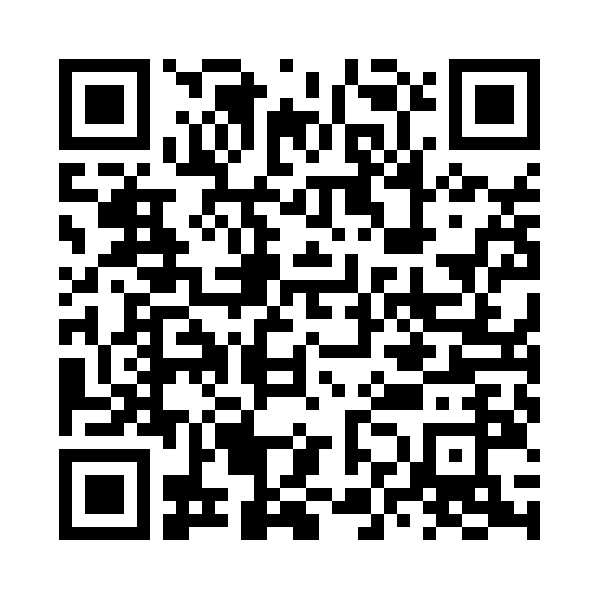
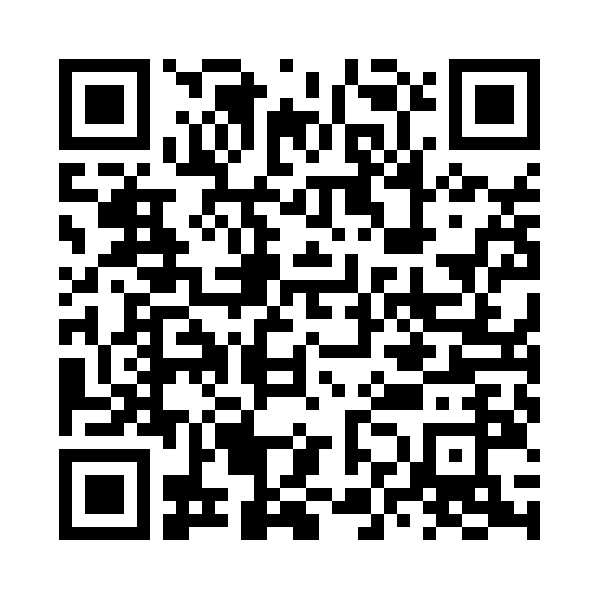

In [83]:
print(soup6)

In [84]:
para_url6 = soup6.find_all('p')
para_url6

[<p class="text-muted">Searching for your content...</p>,
 <p class="media-heading" title="In-Language News">
 In-Language News
 </p>,
 <p class="text-center">
 <a class="omniture-sticky-menu" href="/contact-us/">Contact Us</a>
 </p>,
 <p class="text-center">
 <a class="omniture-sticky-menu" href="tel:+1-888-776-0942"> 888-776-0942</a>
 <br/>
 <span class="text-muted small">from 8 AM - 10 PM ET</span>
 </p>,
 <p class="meta">News provided by</p>,
 <p class="mb-no">14 Nov, 2023, 16:45 ET</p>,
 <p class="meta text-uppercase mb-s">Share this article</p>,
 <p><span class="legendSpanClass"><span class="xn-location">JUSTIN, Texas</span></span>, <span class="legendSpanClass"><span class="xn-chron">Nov. 14, 2023</span></span> /PRNewswire/ -- Canoo Inc. (Nasdaq: <a class="ticket-symbol" data-toggle="modal" href="#financial-modal">GOEV</a>), a high-tech mobility company, today announced its financial results for the third quarter of 2023.</p>,
 <p>"We are now in our manufacturing and revenue-gen

In [85]:
Company_detail6 = ""
for paragraph in para_url6:
    paragraph_text6 = paragraph.get_text(separator='\n', strip=True)
    Company_detail6 += paragraph_text6 + "\n\n"
print(Company_detail6)

Searching for your content...

In-Language News

Contact Us

888-776-0942
from 8 AM - 10 PM ET

News provided by

14 Nov, 2023, 16:45 ET

Share this article

JUSTIN, Texas
,
Nov. 14, 2023
/PRNewswire/ -- Canoo Inc. (Nasdaq:
GOEV
), a high-tech mobility company, today announced its financial results for the third quarter of 2023.

"We are now in our manufacturing and revenue-generation phase, while we still have things left to prove. We have worked nearly three years to get to this point," said Tony Aquila, Investor, Executive Chairman and CEO of Canoo. "The bets we have made around the redesign and functionality of our platform are beginning to play out successfully at multiple levels. We continue to move toward our goal of achieving 20,000 annual unit capacity. I think that's a tribute to the scrappiness of our team driving value to our customers and partners."

Third Quarter
& Recent Business Updates:

Third Quarter
Financial Highlights:

Second Half 2023 Business Outlook - Updated



In [86]:
details_segments6 = Company_detail6.split('\n')

details_segments6 = [segment.strip() for segment in details_segments6 if segment.strip()]

df6 = pd.DataFrame({'Paragraph': details_segments6})

print(df6)

                                             Paragraph
0                        Searching for your content...
1                                     In-Language News
2                                           Contact Us
3                                         888-776-0942
4                                 from 8 AM - 10 PM ET
..                                                 ...
736  Canoo Inc. (Nasdaq: GOEV), a leading high-tech...
737                                         Automotive
738                             Computer & Electronics
739                                           Earnings
740                                           Earnings

[741 rows x 1 columns]


In [87]:
df = pd.concat([df, df6], ignore_index=True)
print(df)

                                             Paragraph
0    Canoo Inc. is an American automotive company b...
1    Canoo was founded in 2017 under the name Evelo...
2    In April 2018, Evelozcity Canoo hired Karl-Tho...
3                                                     
4    In September 2019, the company presented its f...
..                                                 ...
815  Canoo Inc. (Nasdaq: GOEV), a leading high-tech...
816                                         Automotive
817                             Computer & Electronics
818                                           Earnings
819                                           Earnings

[820 rows x 1 columns]


In [89]:
print(df)

                                             Paragraph
0    Canoo Inc. is an American automotive company b...
1    Canoo was founded in 2017 under the name Evelo...
2    In April 2018, Evelozcity Canoo hired Karl-Tho...
3                                                     
4    In September 2019, the company presented its f...
..                                                 ...
815  Canoo Inc. (Nasdaq: GOEV), a leading high-tech...
816                                         Automotive
817                             Computer & Electronics
818                                           Earnings
819                                           Earnings

[820 rows x 1 columns]


In [90]:
df = df.to_csv('paragraph_data.csv')